In [1]:
from selenium import webdriver
import time
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select
import requests
import bs4
from bs4 import BeautifulSoup
import lxml
import html5lib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [ ]:
# Set up the options for the Chrome WebDriver
chrome_options = webdriver.ChromeOptions()
# You can add additional options if needed, such as specifying the Chrome binary location.

# Create the Chrome WebDriver instance using the specified options
driver = webdriver.Chrome(options=chrome_options)

# Now you can use the driver to navigate to a website
driver.get("https://www.booking.com")
time.sleep(10)


### Remove Popup

In [ ]:
try:
    popup = driver.find_element(By.XPATH, '//*[@id="b2indexPage"]/div[17]/div/div/div/div[1]/div[1]/div/button')
    popup.click()
except:
    pass

### Pass value in filters

In [ ]:
location = driver.find_element(By.XPATH, '//input[@class="eb46370fe1"]')
location.click()
location.send_keys('Lahore')
time.sleep(1)

In [ ]:
start_date = driver.find_element(By.XPATH,'//div[@class="f73e6603bf"]')
start_date.click()

check_in = driver.find_element(By.XPATH, '//*[@id="calendar-searchboxdatepicker"]/div/div[1]/div/div[1]/table/tbody/tr[5]/td[3]/span')
check_in.click()
time.sleep(1)

check_out = driver.find_element(By.XPATH, '//*[@id="calendar-searchboxdatepicker"]/div/div[1]/div/div[1]/table/tbody/tr[5]/td[4]/span')
check_out.click()

In [ ]:
adult_chlidren_room = driver.find_element(By.XPATH,'//button[@class="a83ed08757 ebbedaf8ac ada2387af8"]')
adult_chlidren_room.click()
time.sleep(1)

no_of_adult = driver.find_element(By.XPATH, '//button[@class="a83ed08757 c21c56c305 f38b6daa18 d691166b09 ab98298258 deab83296e bb803d8689 f4d78af12a"]')
no_of_adult.click()
time.sleep(1)

no_of_chlidren = driver.find_element(By.XPATH, '//*[@id="indexsearch"]/div[2]/div/form/div[1]/div[3]/div/div/div/div/div[2]/div[2]/button[2]')
no_of_chlidren.click()
time.sleep(1)

dropdown = driver.find_element(By.XPATH, '//select[@class="ebf4591c8e"]')
age = Select(dropdown)
age.select_by_visible_text('1 year old')



submit_button = driver.find_element(By.XPATH, '//*[@id="indexsearch"]/div[2]/div/form/div[1]/div[4]/button')
submit_button.click()
time.sleep(1)

# Using beautifulsoup to scrape data
### Using different combination of filters I scraped almost 7000 data record from this website

In [ ]:
hotel_name = []
city = []
reviews = []
rating = []
distance = []
nights = []
no_of_adult = []
price = []


for i in range(11):
    soup = BeautifulSoup(driver.page_source, 'lxml')
    sp_hotels_names = soup.find_all('div', attrs={'data-testid': 'title'})
    time.sleep(2)
    sp_city = soup.find_all('span', attrs={'class': 'aee5343fdb def9bc142a', 'data-testid': 'address'})
    time.sleep(2)
    sp_reviews = soup.find_all('div', attrs={'class' : 'abf093bdfe f45d8e4c32 d935416c47'})
    time.sleep(2)
    sp_rating = soup.find_all('div', attrs={'class':'a3b8729ab1 d86cee9b25'})
    time.sleep(2)
    sp_distance_from_center = soup.find_all('span',attrs={'aria-expanded':"false", 'data-testid':"distance"})
    time.sleep(2)
    sp_nights = soup.find_all('div', attrs={'class':"abf093bdfe f45d8e4c32", 'data-testid':'price-for-x-nights'})
    time.sleep(2)
    sp_price = soup.find_all('span', attrs={'class' : 'f6431b446c fbfd7c1165 e84eb96b1f'})
    time.sleep(2)
    
    for i in range(len(sp_hotels_names)):
        hotel_name.append(sp_hotels_names[i].text)
        city.append(sp_city[i].text)
        distance.append(sp_distance_from_center[i].text.split()[0])
        nights.append(sp_nights[i].text[0])
        no_of_adult.append(sp_nights[i].text[9])
        price.append(sp_price[i].text.split()[1])
        
    for i in range(len(sp_reviews)):
        reviews.append(sp_reviews[i].text.split()[0])
    for i in range(len(sp_rating)):
        rating.append(sp_rating[i].text)
        
        

    next = driver.find_element(By.XPATH, '//button[@aria-label="Next page"]')
    next.click()
    time.sleep(10)
    

driver.quit()

### ADDING SCRAPE DATA TO PANDAS DATAFRAME

In [ ]:
max_length = max(len(reviews), len(hotel_name),len(rating))

import pandas as pd
data = {'Name':hotel_name, 
        'City':city,
        'Reviews':reviews +  [None] * (max_length - len(reviews)), 
        'Rating':rating +  [None] * (max_length - len(rating)),
        'Distance':distance, 'Nights':nights, 'No_of_adult':no_of_adult, 'Price':price}
df = pd.DataFrame(data)

In [ ]:
df.to_csv('hotel_prices.csv', index=False)

In [ ]:
existing_file_path = 'hotel_prices.csv'
existing_data = pd.read_csv(existing_file_path)

updated_data = existing_data.append(df, ignore_index=True)

updated_data.to_csv('hotel_prices.csv', index=False)

In [2]:
df = pd.read_csv('hotel_prices.csv', encoding='ISO-8859-1')
df.shape

(7321, 9)

In [3]:
df.head()

,Name,City,Reviews,Rating,Distance,Nights,No_of_adult,Price,No_of_room
0,One Constitution Avenue by Goldfinch,Islamabad,234,7.4,2.3,1,1,"18,240",1
1,Villa Vista,Islamabad,17,9.1,1.6,1,1,"22,320",1
2,SK Residence,Islamabad,98,9.0,11.7,1,1,"7,600",1
3,Royal Regency Hotel,Islamabad,37,8.2,1.0,1,1,"22,032",1
4,Serenity Corner,Islamabad,100,8.1,18.3,1,1,"15,000",1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7321 entries, 0 to 7320
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         7321 non-null   object 
 1   City         7321 non-null   object 
 2   Reviews      6339 non-null   object 
 3   Rating       6292 non-null   float64
 4   Distance     7321 non-null   float64
 5   Nights       7321 non-null   int64  
 6   No_of_adult  7321 non-null   object 
 7   Price        7321 non-null   object 
 8   No_of_room   7321 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 514.9+ KB


In [5]:
df['Reviews'] = df['Reviews'].str.replace(',', '').astype(float)
df['Price'] = df['Price'].str.replace(',', '').astype(int)
df['No_of_adult'] = df['No_of_room'].astype(int)

In [6]:
df.isna().sum()

Name              0
City              0
Reviews         982
Rating         1029
Distance          0
Nights            0
No_of_adult       0
Price             0
No_of_room        0
dtype: int64

In [7]:
df.describe()

,Reviews,Rating,Distance,Nights,No_of_adult,Price,No_of_room
count,6339.000000,6292.000000,7321.000000,7321.000000,7321.000000,7.321000e+03,7321.000000
mean,133.196245,7.139431,19.197678,1.288895,1.633383,2.290052e+04,1.633383
std,337.768943,1.844503,56.274721,0.588829,0.902486,3.679845e+04,0.902486
min,1.000000,1.000000,0.500000,1.000000,1.000000,4.500000e+02,1.000000
25%,5.000000,6.300000,4.600000,1.000000,1.000000,7.425000e+03,1.000000
50%,20.000000,7.400000,8.500000,1.000000,1.000000,1.240000e+04,1.000000
75%,93.000000,8.300000,12.700000,1.000000,2.000000,2.280000e+04,2.000000
max,3284.000000,10.000000,450.000000,3.000000,4.000000,1.027050e+06,4.000000


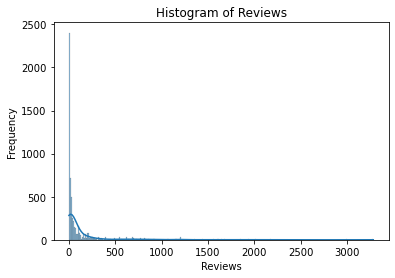

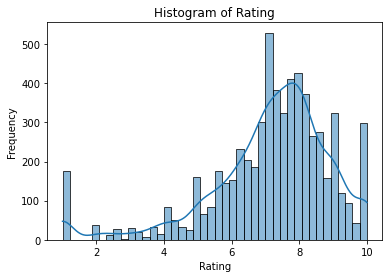

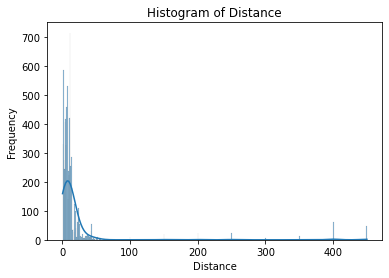

In [8]:
target_columns = ['Reviews','Rating','Distance']


for columns in df.columns:
    if columns in target_columns:
        plt.Figure(figsize=(8,4))
        sns.histplot(df[columns],kde = True)
        plt.title(f'Histogram of {columns}')
        plt.xlabel(columns)
        plt.ylabel('Frequency')
        plt.show()

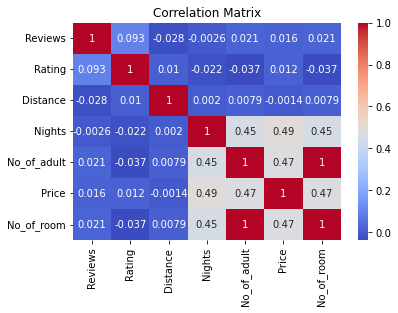

In [9]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

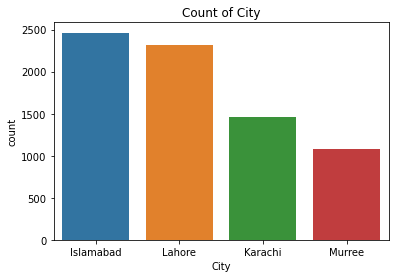

In [10]:
sns.countplot(x='City', data=df)
plt.title('Count of City')
plt.show()

In [11]:
df.head()

,Name,City,Reviews,Rating,Distance,Nights,No_of_adult,Price,No_of_room
0,One Constitution Avenue by Goldfinch,Islamabad,234.0,7.4,2.3,1,1,18240,1
1,Villa Vista,Islamabad,17.0,9.1,1.6,1,1,22320,1
2,SK Residence,Islamabad,98.0,9.0,11.7,1,1,7600,1
3,Royal Regency Hotel,Islamabad,37.0,8.2,1.0,1,1,22032,1
4,Serenity Corner,Islamabad,100.0,8.1,18.3,1,1,15000,1


### Removing outliers

C:\Users\saadr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


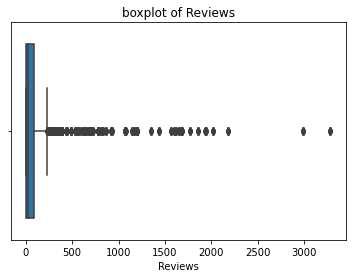

C:\Users\saadr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


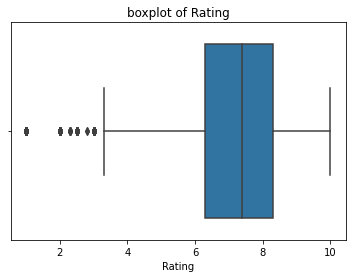

C:\Users\saadr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


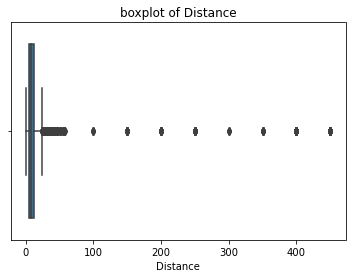

In [12]:
target_columns = ['Reviews','Rating','Distance']


for columns in df.columns:
    if columns in target_columns:
        plt.Figure(figsize=(8,4))
        sns.boxplot(df[columns])
        plt.title(f'boxplot of {columns}')
        plt.show()

In [13]:
q1 = df['Reviews'].quantile(0.25)
q3 = df['Reviews'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

# df['Reviews'] = np.where(df['Reviews'] < lower_bound, lower_bound,
#                           (np.where(df['Reviews'] > upper_bound, upper_bound, df['Reviews']))
#                           )
df = df[(df['Reviews']<upper_bound)&(df['Reviews']>lower_bound)]

In [14]:
df.shape

(5553, 9)

In [15]:
q1 = df['Rating'].quantile(0.25)
q3 = df['Rating'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

# df['Rating'] = np.where(df['Rating'] < lower_bound, lower_bound,
#                           (np.where(df['Rating'] > upper_bound, upper_bound, df['Rating']))
#                           )

df = df[(df['Rating']<upper_bound)&(df['Rating']>lower_bound)]

In [16]:
q1 = df['Distance'].quantile(0.25)
q3 = df['Distance'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

# df['Distance'] = np.where(df['Distance'] < lower_bound, lower_bound,
#                           (np.where(df['Distance'] > upper_bound, upper_bound, df['Distance']))
#                           )

df = df[(df['Distance']<upper_bound)&(df['Distance']>lower_bound)]

C:\Users\saadr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


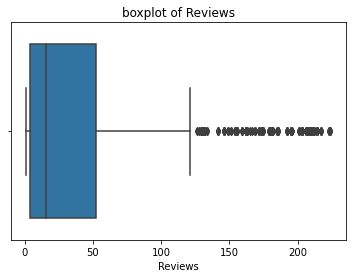

C:\Users\saadr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


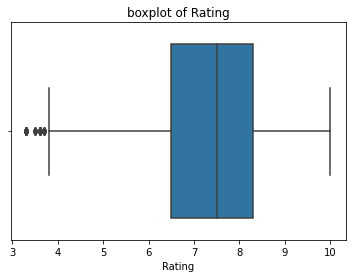

C:\Users\saadr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


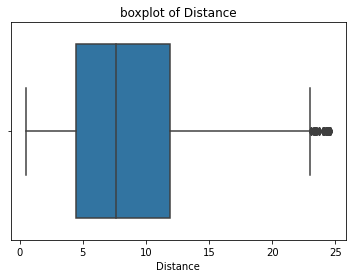

In [17]:
target_columns = ['Reviews','Rating','Distance']


for columns in df.columns:
    if columns in target_columns:
        plt.Figure(figsize=(8,4))
        sns.boxplot(df[columns])
        plt.title(f'boxplot of {columns}')
        plt.show()

In [18]:
df['Rating'] = np.where(df['Rating'] < lower_bound, lower_bound,
                          (np.where(df['Rating'] > upper_bound, upper_bound, df['Rating']))
                          )


df['Distance'] = np.where(df['Distance'] < lower_bound, lower_bound,
                          (np.where(df['Distance'] > upper_bound, upper_bound, df['Distance']))
                          )

df['Reviews'] = np.where(df['Reviews'] < lower_bound, lower_bound,
                          (np.where(df['Reviews'] > upper_bound, upper_bound, df['Reviews']))
                          )

C:\Users\saadr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


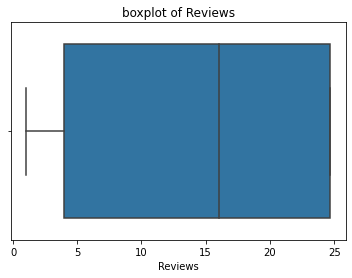

C:\Users\saadr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


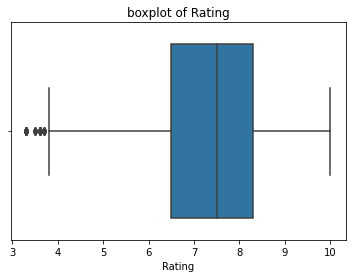

C:\Users\saadr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


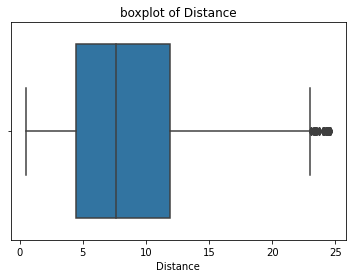

In [19]:
target_columns = ['Reviews','Rating','Distance']


for columns in df.columns:
    if columns in target_columns:
        plt.Figure(figsize=(8,4))
        sns.boxplot(df[columns])
        plt.title(f'boxplot of {columns}')
        plt.show()

In [20]:
q1 = df['Rating'].quantile(0.25)
q3 = df['Rating'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

# df['Rating'] = np.where(df['Rating'] < lower_bound, lower_bound,
#                           (np.where(df['Rating'] > upper_bound, upper_bound, df['Rating']))
#                           )

df = df[(df['Rating']<upper_bound)&(df['Rating']>lower_bound)]

In [21]:
q1 = df['Distance'].quantile(0.25)
q3 = df['Distance'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

# df['Distance'] = np.where(df['Distance'] < lower_bound, lower_bound,
#                           (np.where(df['Distance'] > upper_bound, upper_bound, df['Distance']))
#                           )

df = df[(df['Distance']<upper_bound)&(df['Distance']>lower_bound)]

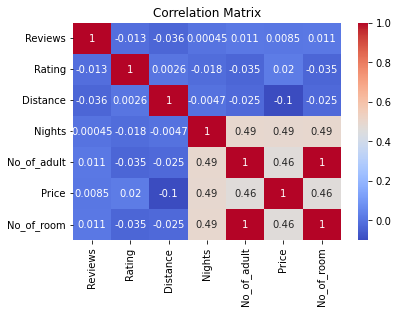

In [22]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

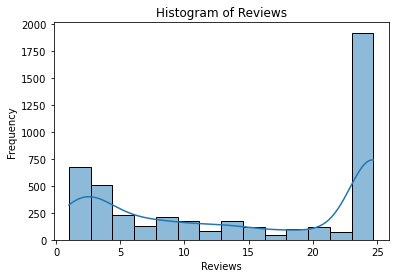

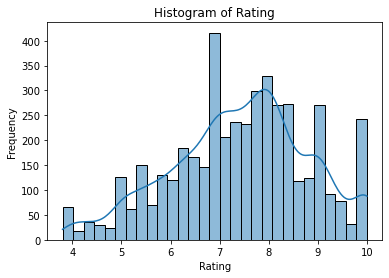

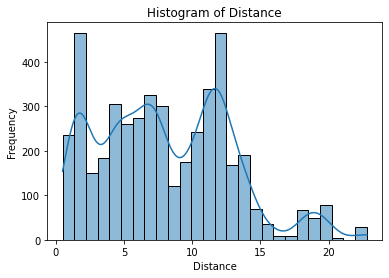

In [23]:
target_columns = ['Reviews','Rating','Distance']


for columns in df.columns:
    if columns in target_columns:
        plt.Figure(figsize=(8,4))
        sns.histplot(df[columns],kde = True)
        plt.title(f'Histogram of {columns}')
        plt.xlabel(columns)
        plt.ylabel('Frequency')
        plt.show()

In [24]:
df = df.drop('Name',axis = 1)

In [25]:
df = df.drop_duplicates()

In [26]:
df[df.duplicated()]

,City,Reviews,Rating,Distance,Nights,No_of_adult,Price,No_of_room


### Train test split

In [27]:
X = df.drop('Price',axis=1)
y = df['Price']

X_train,X_holdout,y_train,y_holdout = train_test_split(X, y, test_size=0.15, random_state=42)
X_train.shape, X_holdout.shape, y_train.shape, y_holdout.shape

X_train,X_test,y_train,y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

imp = SimpleImputer(missing_values=np.nan,strategy='mean')
imp.fit(X_train.iloc[:,1:3])

X_train.iloc[:,1:3] = imp.transform(X_train.iloc[:,1:3])
X_test.iloc[:,1:3] = imp.transform(X_test.iloc[:,1:3])


ohe = OneHotEncoder(drop='first',sparse=False,dtype=np.int32)

tranformer = ColumnTransformer(transformers=[('Onehot',ohe,[0]),
                                            ],
                              remainder='passthrough')

tranformer.fit(X_train)
X_train_encode = tranformer.transform(X_train)
X_test_encode = tranformer.transform(X_test)

ss = StandardScaler()
ss.fit(X_train_encode)
X_train_scale = ss.transform(X_train_encode)
X_test_scale = ss.transform(X_test_encode)

In [28]:
lr_model = LinearRegression()
lr_model.fit(X_train_scale, y_train)

LinearRegression()

In [29]:
y_predicted = lr_model.predict(X_test_scale)

mae = mean_absolute_error(y_test, y_predicted)
mse = mean_squared_error(y_test, y_predicted)
rmse = np.sqrt(mse)
print("MAE:", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)

MAE: 15294.705748320006
MSE:  1080768039.566725
RMSE:  32875.03672342778


In [30]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_predicted)
print("R2 Score: ", r2)


R2 Score:  0.3077026973259984


In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

dt_regressor = DecisionTreeRegressor(max_depth=4)
dt_regressor.fit(X_train_scale, y_train)



dt_predictions = dt_regressor.predict(X_test_scale)

dt_r2 = r2_score(y_test, dt_predictions)

In [32]:
print("dt_R2 Scores: ", dt_r2)

dt_R2 Scores:  0.30756570656296534


In [ ]:
from sklearn.model_selection import cross_val_score
scores_array = cross_val_score(LinearRegression(), X_train_scale, y_train, cv=5, scoring='r2')


In [33]:
from sklearn.model_selection import cross_val_score
scores_array = cross_val_score(LinearRegression(), X_train_scale, y_train, cv=5, scoring='r2')
print("R2 scores for all the folds: ", scores_array)
print("Mean R2 score: ", np.mean(scores_array))

R2 scores for all the folds:  [0.3750881  0.35891093 0.35502174 0.22930201 0.31549927]
Mean R2 score:  0.326764408930212


In [34]:
from sklearn.linear_model import Ridge
cv_scores = cross_val_score(
                             estimator = Ridge(alpha=100, solver='lsqr'), X = X_train_scale,y = y_train, scoring = 'r2',cv = 5)

print("R2 scores for all the folds: ", cv_scores)
print("Mean R2 score: ", np.mean(cv_scores))


R2 scores for all the folds:  [0.37878976 0.35890516 0.35435736 0.22702644 0.32087664]
Mean R2 score:  0.32799107077480266


In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

params = { 'alpha': [1000, 100, 10, 1, 0.5],
 'solver': ['lsqr', 'svd'] }
gs = GridSearchCV(estimator=Ridge(), 
 param_grid=params,
scoring='r2',
cv=5,
n_jobs=-1) 
gs.fit(X_train_scale, y_train)
print("Best Score: ", gs.best_score_)
print("Best Score: ", gs.best_params_)


Best Score:  0.32799696524868327
Best Score:  {'alpha': 100, 'solver': 'svd'}


In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

params = { 'alpha': [1000000, 10000, 1000,100,10]}
gs = GridSearchCV(estimator= Lasso(), 
 param_grid=params,
scoring='r2',
cv=5,
n_jobs=-1) 
gs.fit(X_train_scale, y_train)
print("Best Score: ", gs.best_score_)
print("Best Score: ", gs.best_params_)

Best Score:  0.32731118103155393
Best Score:  {'alpha': 100}


In [42]:
cv_scores = cross_val_score(estimator = DecisionTreeRegressor(max_depth=6), X = X_train_scale,y = y_train, scoring = 'r2',cv = 5)

print("R2 scores for all the folds: ", cv_scores)
print("Mean R2 score: ", np.mean(cv_scores))

R2 scores for all the folds:  [-0.23467533 -1.39765743  0.32107668  0.17048813 -0.03137625]
Mean R2 score:  -0.2344288396451965


In [45]:
df.head()

,City,Reviews,Rating,Distance,Nights,No_of_adult,Price,No_of_room
1,Islamabad,17.0,9.1,1.6,1,1,22320,1
2,Islamabad,24.7,9.0,11.7,1,1,7600,1
3,Islamabad,24.7,8.2,1.0,1,1,22032,1
4,Islamabad,24.7,8.1,18.3,1,1,15000,1
5,Islamabad,18.0,8.1,4.5,1,1,21000,1


In [43]:
categorical_tranformer = Pipeline(steps=[('imputer',SimpleImputer(missing_values=np.nan,strategy='most_frequent')),
                                        ('ohe',OneHotEncoder(drop='first',handle_unknown='ignore'))])

In [44]:
numerical_tranformer = Pipeline(steps=[('impute',SimpleImputer(missing_values=np.nan,strategy='mean'))])

In [46]:
preprocessor = ColumnTransformer(transformers=[('numerical',numerical_tranformer,[1,2,3,4,5,6]),
                                              ('categorical',categorical_tranformer,[0])],
                                remainder='passthrough')

In [48]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                       ("scaling",StandardScaler(with_mean=False)),
                       ('classify',LinearRegression())])

In [49]:
model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer())]),
                                                  [1, 2, 3, 4, 5, 6]),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  [0])])),
                ('s

In [50]:
print("r2 Score:", cross_val_score(model,X_train, y_train, cv=5, scoring='r2').mean())

r2 Score: 0.3267644089302125


In [51]:
y_pred = model.predict(X_test)

In [52]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MAE:", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)

r2 = r2_score(y_test, y_pred)
print("R2 Score: ", r2)

MAE: 15294.70574831958
MSE:  1080768039.5667307
RMSE:  32875.03672342787
R2 Score:  0.30770269732599476


In [53]:
y_pred_holdout = model.predict(X_holdout)

mae = mean_absolute_error(y_holdout, y_pred_holdout)
mse = mean_squared_error(y_holdout, y_pred_holdout)
rmse = np.sqrt(mse)
print("MAE:", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)

r2 = r2_score(y_holdout, y_pred_holdout)
print("R2 Score: ", r2)

MAE: 14324.155354646073
MSE:  619143590.6673582
RMSE:  24882.5961400204
R2 Score:  0.38877741068688143


In [54]:
import joblib
joblib.dump(model,'lr_regression.pkl')

['lr_regression.pkl']

In [55]:
loaded_model = joblib.load('lr_regression.pkl')

In [61]:
City = 'Lahore'
Reviews = 10
Rating = 7.8
Distance = 3
Nights = 2
No_of_adult = 3 
No_of_room = 1

In [64]:
test_input = np.array([[City, Reviews, Rating, Distance,Nights ,No_of_adult, No_of_room]], dtype= 'object')

In [65]:
print("loaded_model", loaded_model.predict(test_input))

loaded_model [48437.08322927]


C:\Users\saadr\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\saadr\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [ ]:
### I should add to more data and feature to this model to avoid underfiting